In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [65]:
print(observations.head())
print(observations.size)
print(observations.describe())
print(observations.dtypes)
print(observations.scientific_name.nunique())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
69888
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
scientific_name    object
park_name          object
observations        int64
dtype: object
5541


In [66]:
observations.groupby("scientific_name").observations.count().reset_index()

,scientific_name,observations
0,Abies bifolia,4
1,Abies concolor,4
2,Abies fraseri,4
3,Abietinella abietina,4
4,Abronia ammophila,4
...,...,...
5536,Zonotrichia leucophrys gambelii,4
5537,Zonotrichia leucophrys oriantha,4
5538,Zonotrichia querula,4
5539,Zygodon viridissimus,4


In [67]:
print(species.head())
#print(species.size)
print(species.describe())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4

In [68]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [69]:
species.fillna("No Endangered", inplace=True)
new_species = species.groupby(["category", "conservation_status"]).common_names.count().reset_index()
new_species.rename(columns={"common_names":"Frequency"})

,category,conservation_status,Frequency
0,Amphibian,Endangered,1
1,Amphibian,No Endangered,73
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,No Endangered,442
7,Bird,Species of Concern,72
8,Fish,Endangered,3
9,Fish,No Endangered,116


In [70]:
counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()
counts

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Endangered,5363
3,Species of Concern,151
4,Threatened,10


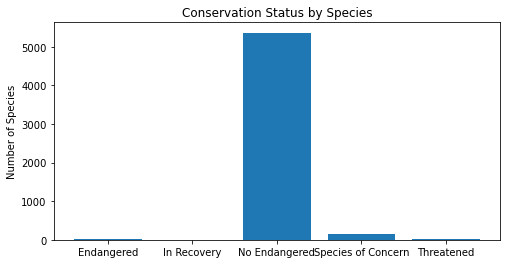

In [71]:
plt.figure(figsize=(8, 4))
ax = plt.subplot()
plt.bar(range(len(counts)),
        counts.scientific_name.values)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()